# Кластерний аналіз

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
dataframe = pd.read_csv('seeds.csv')
dataframe.head()

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [73]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  207 non-null    float64
 3   length       210 non-null    float64
 4   width        207 non-null    float64
 5   asymmetry    210 non-null    float64
 6   length.1     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [74]:
dataframe.isna().sum()

area           0
perimeter      0
compactness    3
length         0
width          3
asymmetry      0
length.1       0
dtype: int64

In [75]:
dataframe.dropna(inplace=True)
dataframe.isna().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
length.1       0
dtype: int64

In [76]:
dataframe.duplicated().sum()

0

In [77]:
X = dataframe.values[:,0:]
clusters_df = StandardScaler().fit_transform(X)
clusters_df

array([[ 0.12738133,  0.20191062, -0.02317024, ...,  0.12480205,
        -0.97776824, -0.40819684],
       [-0.00373661, -0.00539327,  0.41335364, ...,  0.18089066,
        -1.78129567, -0.94931312],
       [-0.20731446, -0.37393352,  1.44631609, ...,  0.19157421,
        -0.65849466, -1.21782157],
       ...,
       [-0.58341592, -0.70408415,  0.72453898, ..., -0.08886886,
         3.09263589, -0.74434483],
       [-1.05268013, -1.04959063, -0.84003175, ..., -1.14653986,
        -0.05801988, -0.76894102],
       [-0.89395841, -0.94977765, -0.13554272, ..., -0.77795754,
         1.30390234, -0.72999705]])

C:\Users\fidde\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fidde\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fidde\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fidde\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'Error')

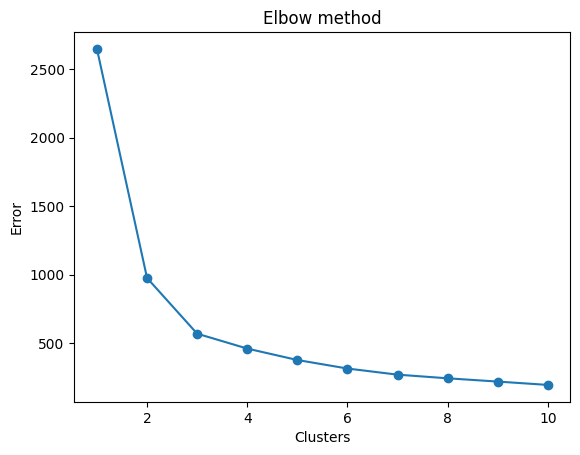

In [78]:
ds = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    ds.append(kmeans.inertia_)

plt.plot(range(1,11), ds, marker="o")
plt.title("Elbow method")
plt.xlabel('Clusters')
plt.ylabel('Error')

In [79]:
cluster_n = 4
k_means = KMeans(init="k-means++", n_clusters=cluster_n, n_init=12)
k_means.fit(clusters_df)
labels = k_means.labels_

In [80]:
dataframe['clust'] = labels

In [81]:
dataframe.groupby('clust').mean()

,area,perimeter,compactness,length,width,asymmetry,length.1
clust,,,,,,,
0,14.013284,14.122836,0.881506,5.432612,3.217075,2.606675,5.051731
1,19.151042,16.469167,0.887090,6.268854,3.772937,3.460417,6.127250
2,16.410357,15.343929,0.875364,5.896571,3.448179,3.928464,5.713536
3,11.854677,13.256613,0.846992,5.239500,2.841726,4.913758,5.135048


Text(0, 0.5, 'length')

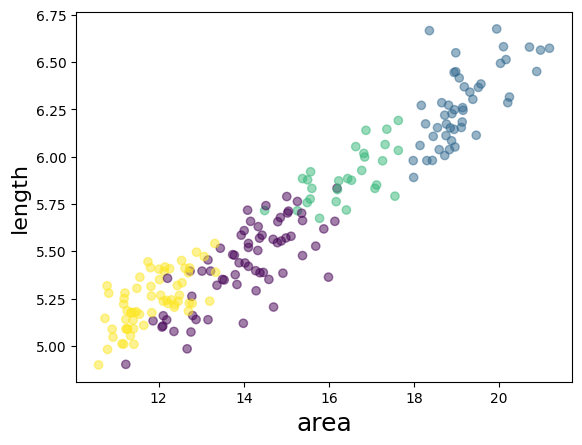

In [82]:
plt.scatter(X[:,0], X[:,3], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('area', fontsize=18)
plt.ylabel('length', fontsize=16)

In [83]:
silhouette_score(X, k_means.predict(clusters_df))

0.37046562119372584

In [84]:
data_test = dataframe[['area', 'length']]

In [85]:
X = data_test.values[:,0:]
clusters_df = StandardScaler().fit_transform(X)

In [86]:
cluster_n = 4
k_means = KMeans(init="k-means++", n_clusters=cluster_n, n_init=12)
k_means.fit(clusters_df)
labels = k_means.labels_

In [87]:
data_test['clust'] = labels
data_test.groupby('clust').mean()

C:\Users\fidde\AppData\Local\Temp\ipykernel_732\651458553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['clust'] = labels


,area,length
clust,,
0,11.881000,5.193157
1,19.130625,6.278583
2,14.066667,5.482157
3,16.257778,5.843333


Text(0, 0.5, 'perimeter')

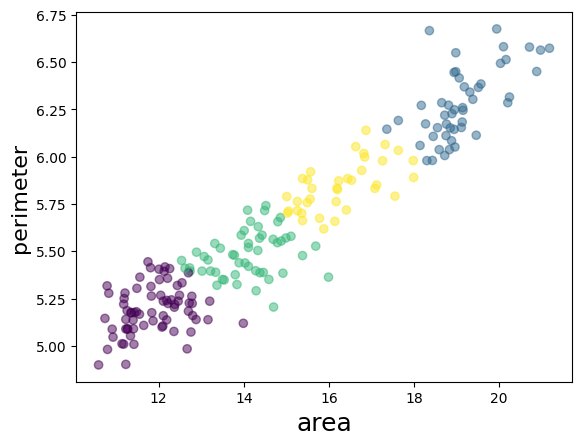

In [88]:
plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('area', fontsize=18)
plt.ylabel('perimeter', fontsize=16)

In [89]:
silhouette_score(X, k_means.predict(clusters_df))


0.5094533266435163

In [90]:
temp_df = dataframe[['width', 'asymmetry']]
X = temp_df.values[:, 0:]
clusters_df = StandardScaler().fit_transform(X)

In [91]:
cluster_n = 3
k_means = KMeans(init="k-means++", n_clusters=cluster_n, n_init=12)
k_means.fit(clusters_df)
labels = k_means.labels_

In [92]:
temp_df['clust'] = labels
temp_df.groupby('clust').mean()

C:\Users\fidde\AppData\Local\Temp\ipykernel_732\1990974003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['clust'] = labels


,width,asymmetry
clust,,
0,3.208508,2.251049
1,2.889426,4.981235
2,3.671486,3.754931


Text(0, 0.5, 'asymmetry')

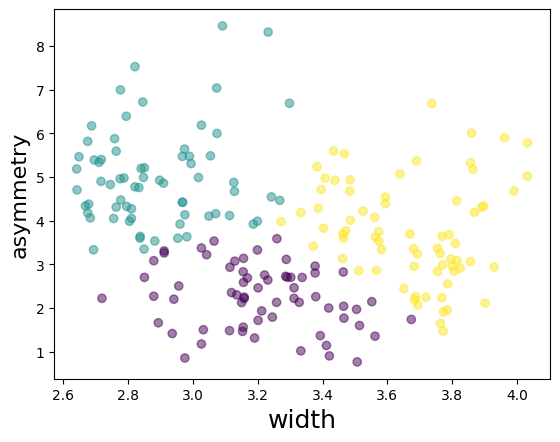

In [93]:
plt.scatter(X[:,0], X[:,1], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('width', fontsize=18)
plt.ylabel('asymmetry', fontsize=16)

In [94]:
silhouette_score(X, k_means.predict(clusters_df))


0.22755811806242365